In [4]:
import numpy as np
import pandas as pd

# Try reading the CSV file with different encodings
try:
    f = pd.read_csv('spam.csv', encoding='utf-8')
except UnicodeDecodeError:
    try:
        f = pd.read_csv('spam.csv', encoding='latin-1')
    except UnicodeDecodeError:
        f = pd.read_csv('spam.csv', encoding='utf-32')

# Continue processing the DataFrame 'f' as needed


In [5]:
df = pd.read_csv('spam.csv',encoding="latin-1")

In [6]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3798,ham,"Actually nvm, got hella cash, we still on for ...",NaN,NaN,NaN
2837,ham,Were trying to find a Chinese food place aroun...,NaN,NaN,NaN
3056,ham,Just woke up. Yeesh its late. But I didn't fal...,NaN,NaN,NaN
731,ham,No he didn't. Spring is coming early yay!,NaN,NaN,NaN
2734,ham,Can you do a mag meeting this avo at some point?,NaN,NaN,NaN


In [7]:
df.shape

(5572, 5)

1. Data Cleaning
2. EDA
3. Text Preprocessing
4. Model building
5. Evaluation 
6. Improvements 
7. Deploy


In [8]:
##Data Cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [9]:
#Drop last 3 cols
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4' ], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [10]:
df.sample(5)

,v1,v2
2483,ham,Mm have some kanji dont eat anything heavy ok
3041,ham,Slaaaaave ! Where are you ? Must I summon you ...
852,ham,No da if you run that it activate the full ver...
1758,ham,Sorry i'm not free...
2498,ham,"I know where the &lt;#&gt; is, I'll be there..."


In [11]:
#renaming the cols
df.rename(columns={'v1' : 'target','v2':'text'}, inplace = True)
df.sample(5)

,target,text
1658,spam,RGENT! This is the 2nd attempt to contact U!U ...
2392,ham,"Thanks da thangam, i feel very very happy dear..."
2004,ham,"Goodmorning, today i am late for &lt;DECIMAL&..."
4445,ham,Merry christmas to u too annie!
3458,spam,Not heard from U4 a while. Call me now am here...


In [12]:
df1 = df.copy

In [13]:
#Lable Ham  & spam 0 or 1
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])

In [14]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [16]:
#Check for duplicate values
df.duplicated().sum()

403

In [17]:
#remove Duplicates
df = df.drop_duplicates(keep='first')
df.duplicated().sum()

0

In [18]:
df.shape

(5169, 2)

2. EDA (Exploratory Data Analysys)

In [19]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [20]:
df['target'].value_counts() #0 = Ham 1 = Spam

target
0    4516
1     653
Name: count, dtype: int64

In [21]:
#Visualize
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'].autopct = )
plt.show

SyntaxError: invalid syntax (1994144211.py, line 3)

#Data is imbalanced 

In [ ]:
import nltk
nltk.download('punkt')



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DetroidX\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DetroidX\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
df["num_characters"] = df['text'].apply(len)
df.head()

C:\Users\DetroidX\AppData\Local\Temp\ipykernel_9884\1155842742.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["num_characters"] = df['text'].apply(len)


,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
#num of words
df["No of words"] = df["text"].apply(lambda x: len(nltk.word_tokenize(x)))

C:\Users\DetroidX\AppData\Local\Temp\ipykernel_9884\2564213496.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["No of words"] = df["text"].apply(lambda x: len(nltk.word_tokenize(x)))


In [ ]:
df.head()

,target,text,num_characters,No of words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [ ]:
df["No of sentences"] = df["text"].apply(lambda x: len(nltk.sent_tokenize(x)))
df.head()

C:\Users\DetroidX\AppData\Local\Temp\ipykernel_9884\893369378.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["No of sentences"] = df["text"].apply(lambda x: len(nltk.sent_tokenize(x)))


,target,text,num_characters,No of words,No of sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [ ]:
df[df['target'] == 0][['num_characters','No of words','No of sentences' ]].describe() #Ham


,num_characters,No of words,No of sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
df[df['target'] == 1][['num_characters','No of words','No of sentences' ]].describe() #spam

,num_characters,No of words,No of sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

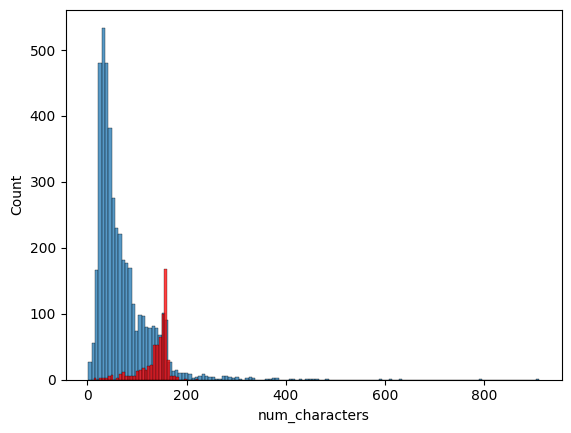

In [ ]:
import seaborn as sns
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color = 'red')

<Axes: xlabel='No of words', ylabel='Count'>

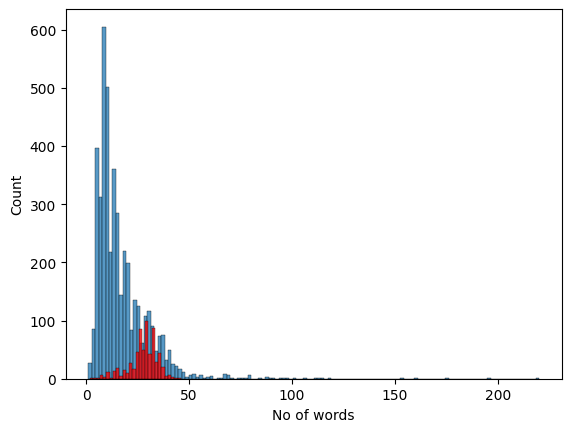

In [ ]:
import seaborn as sns
sns.histplot(df[df['target'] == 0]['No of words'])
sns.histplot(df[df['target'] == 1]['No of words'],color = 'red')

<Axes: xlabel='No of sentences', ylabel='Count'>

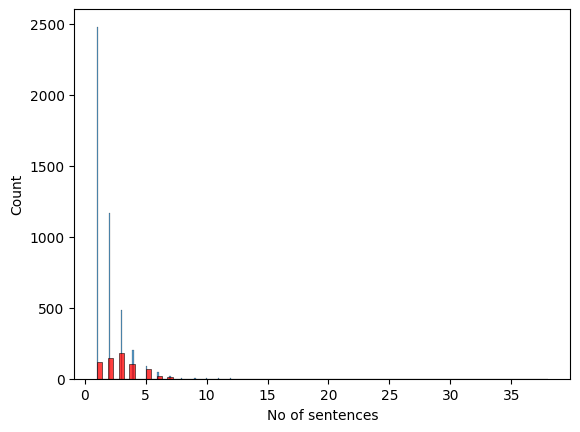

In [ ]:
import seaborn as sns
sns.histplot(df[df['target'] == 0]['No of sentences'])
sns.histplot(df[df['target'] == 1]['No of sentences'],color = 'red')

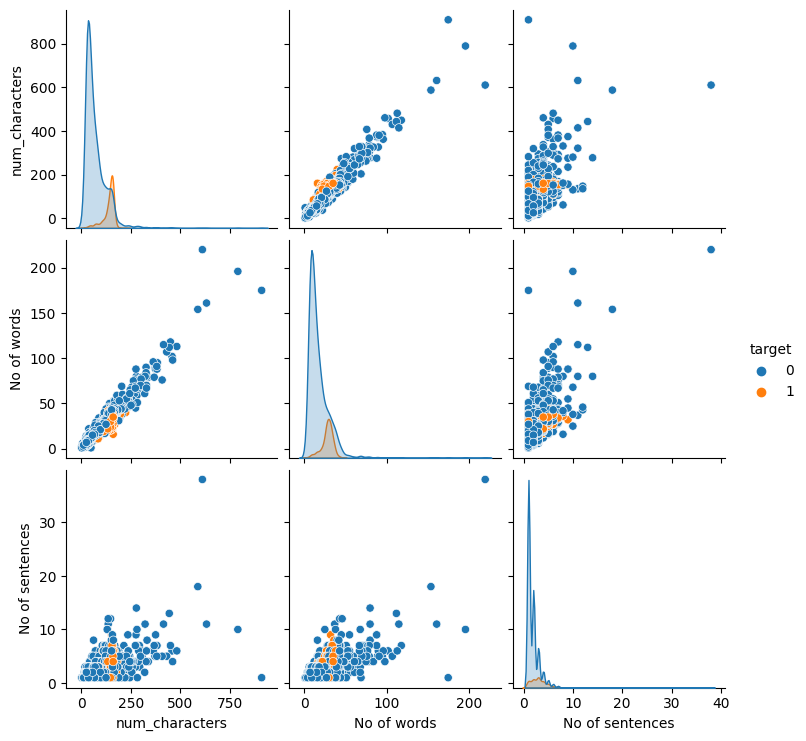

In [ ]:
sns.pairplot(df, hue="target")

3. Data Preprocessing
- Lower case
- Tokenization
- removing special char
- remove stop words & punctuation 
- Stemming

In [35]:
from nltk.stem.porter import PorterStemmer
import nltk
ps = PorterStemmer()
import nltk
from nltk.corpus import stopwords

# Download the stopwords corpus (if not already downloaded)
nltk.download('stopwords')

df['transformed_text'] = df['text'].apply(transform_text)


def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation: 
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

In [38]:
transform_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

NameError: name 'stopwords' is not defined

In [37]:
import nltk
import stopwords
df['transformed_text'] = df['text'].apply(transform_text)

ModuleNotFoundError: No module named 'stopwords'

In [25]:
df.head(12)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
5,1,FreeMsg Hey there darling it's been 3 week's n...
6,0,Even my brother is not like to speak with me. ...
7,0,As per your request 'Melle Melle (Oru Minnamin...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...
